In [1]:
#Importing libraries needed for cleaning and visualizations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading in the character working dataset
char = pd.read_csv('character.csv')
char.head()

,combat,durability,intelligence,name,power,speed,strength,base,id,occupation,relatives,aliases,alignment,alter-egos,full-name,publisher
0,64.0,80.0,38.0,A-Bomb,24.0,17.0,100.0,-,1,"Musician, adventurer, author; formerly talk sh...",Marlo Chandler-Jones (wife); Polly (aunt); Mrs...,['Rick Jones'],good,No alter egos found.,Richard Milhouse Jones,Marvel Comics
1,85.0,65.0,88.0,Abe Sapien,100.0,35.0,28.0,-,2,Paranormal Investigator,"Edith Howard (wife, deceased)","['Langdon Everett Caul', 'Abraham Sapien', 'La...",good,No alter egos found.,Abraham Sapien,Dark Horse Comics
2,65.0,64.0,50.0,Abin Sur,99.0,53.0,90.0,Oa,3,"Green Lantern, former history professor","Amon Sur (son), Arin Sur (sister), Thaal Sines...",['Lagzia'],good,No alter egos found.,NaN,DC Comics
3,95.0,90.0,63.0,Abomination,62.0,53.0,80.0,Mobile,4,Ex-Spy,"Nadia Dornova Blonsky (wife, separated)","['Agent R-7', 'Ravager of Worlds']",bad,No alter egos found.,Emil Blonsky,Marvel Comics
4,55.0,100.0,88.0,Abraxas,100.0,83.0,63.0,-,5,Dimensional destroyer,"Eternity (""Father"")",['-'],bad,No alter egos found.,Abraxas,Marvel Comics


In [3]:
#Vieweing columns from the data
char_cols = char.columns
char_cols

Index(['combat', 'durability', 'intelligence', 'name', 'power', 'speed',
       'strength', 'base', 'id', 'occupation', 'relatives', 'aliases',
       'alignment', 'alter-egos', 'full-name', 'publisher'],
      dtype='object')

In [4]:
#Shape of the DataFrame
char.shape

(774, 16)

In [5]:
#Descriptive Statistics
char.describe()

,combat,durability,intelligence,power,speed,strength,id
count,589.000000,589.000000,589.000000,589.000000,589.000000,658.000000,774.000000
mean,61.989813,59.417657,64.772496,64.584041,40.755518,44.528875,363.936693
std,23.239947,30.001906,19.949235,29.754183,24.380655,32.810603,213.341862
min,5.000000,1.000000,6.000000,0.000000,1.000000,4.000000,1.000000
25%,42.000000,30.000000,50.000000,38.000000,23.000000,11.000000,176.250000
50%,64.000000,60.000000,63.000000,64.000000,33.000000,37.000000,361.500000
75%,80.000000,90.000000,75.000000,100.000000,53.000000,80.000000,550.750000
max,101.000000,110.000000,100.000000,100.000000,100.000000,100.000000,732.000000


In [6]:
#Descriptive statistics for categorial data
char.describe(include = np.object)

,name,base,occupation,relatives,aliases,alignment,alter-egos,full-name,publisher
count,774,774,774,774,774,774,774,668,759
unique,713,284,386,459,481,4,75,594,88
top,Spider-Man,-,-,-,['-'],good,No alter egos found.,Hank Pym,Marvel Comics
freq,9,401,312,286,257,534,686,6,354


In [7]:
#Veiwing datatypes 
char.dtypes

combat          float64
durability      float64
intelligence    float64
name             object
power           float64
speed           float64
strength        float64
base             object
id                int64
occupation       object
relatives        object
aliases          object
alignment        object
alter-egos       object
full-name        object
publisher        object
dtype: object

In [8]:
char.isnull().sum()

combat          185
durability      185
intelligence    185
name              0
power           185
speed           185
strength        116
base              0
id                0
occupation        0
relatives         0
aliases           0
alignment         0
alter-egos        0
full-name       106
publisher        15
dtype: int64

In [9]:
powers_df = char[['combat', 'durability', 'intelligence', 'power', 'speed', 'strength']]
powers_df.head()

,combat,durability,intelligence,power,speed,strength
0,64.0,80.0,38.0,24.0,17.0,100.0
1,85.0,65.0,88.0,100.0,35.0,28.0
2,65.0,64.0,50.0,99.0,53.0,90.0
3,95.0,90.0,63.0,62.0,53.0,80.0
4,55.0,100.0,88.0,100.0,83.0,63.0


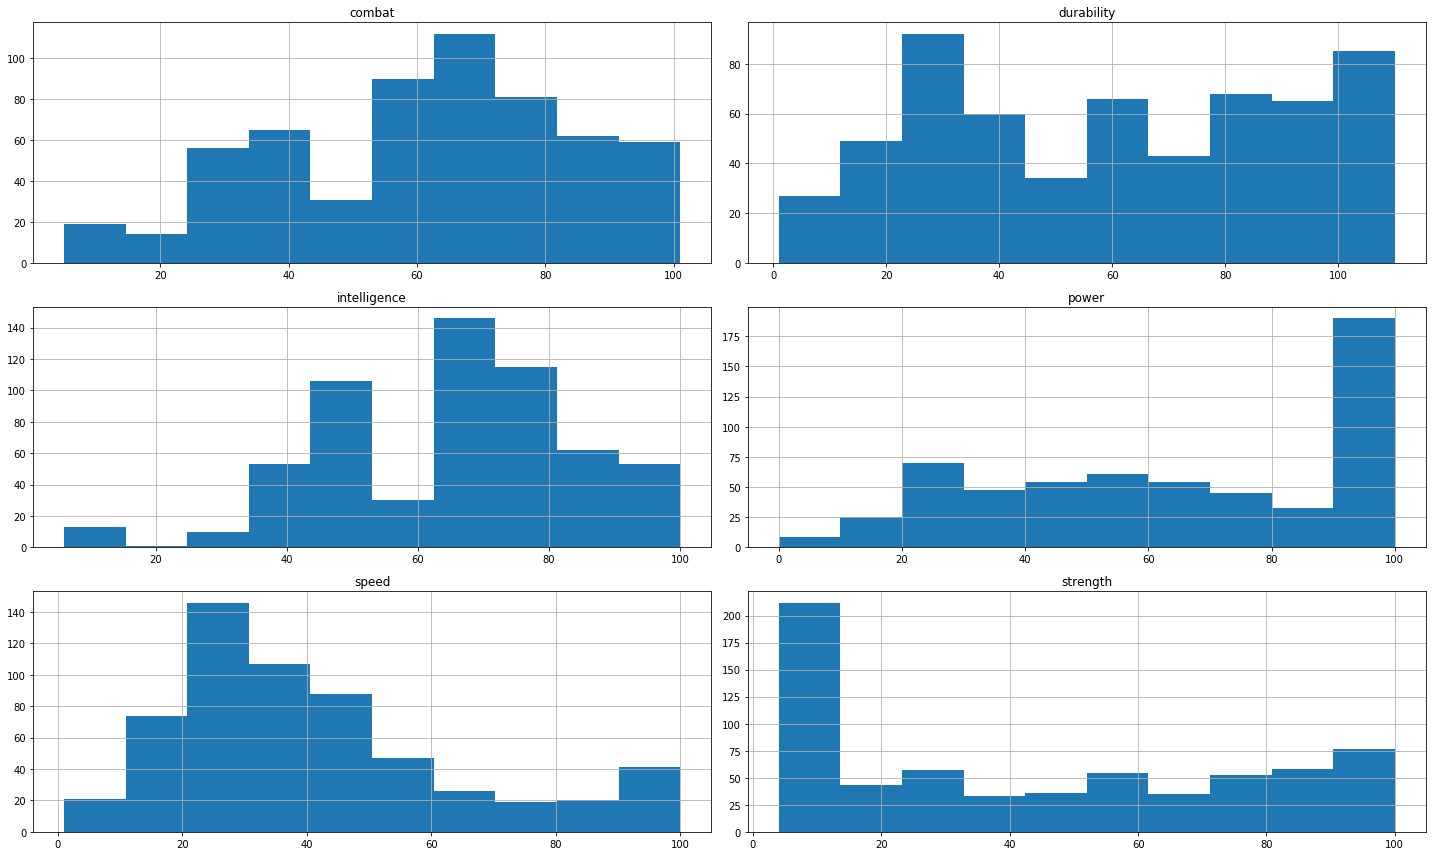

In [10]:
#Viewing the distribution of powers
powers_df.hist(figsize = (20,12))
plt.tight_layout()
plt.show()

In [11]:
power_corr = powers_df.corr()
power_corr

,combat,durability,intelligence,power,speed,strength
combat,1.000000,0.203480,0.345729,0.135028,0.168606,0.234424
durability,0.203480,1.000000,0.194319,0.514578,0.482662,0.689928
intelligence,0.345729,0.194319,1.000000,0.247610,0.183029,0.199630
power,0.135028,0.514578,0.247610,1.000000,0.451180,0.459520
speed,0.168606,0.482662,0.183029,0.451180,1.000000,0.506935
strength,0.234424,0.689928,0.199630,0.459520,0.506935,1.000000


//anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
//anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


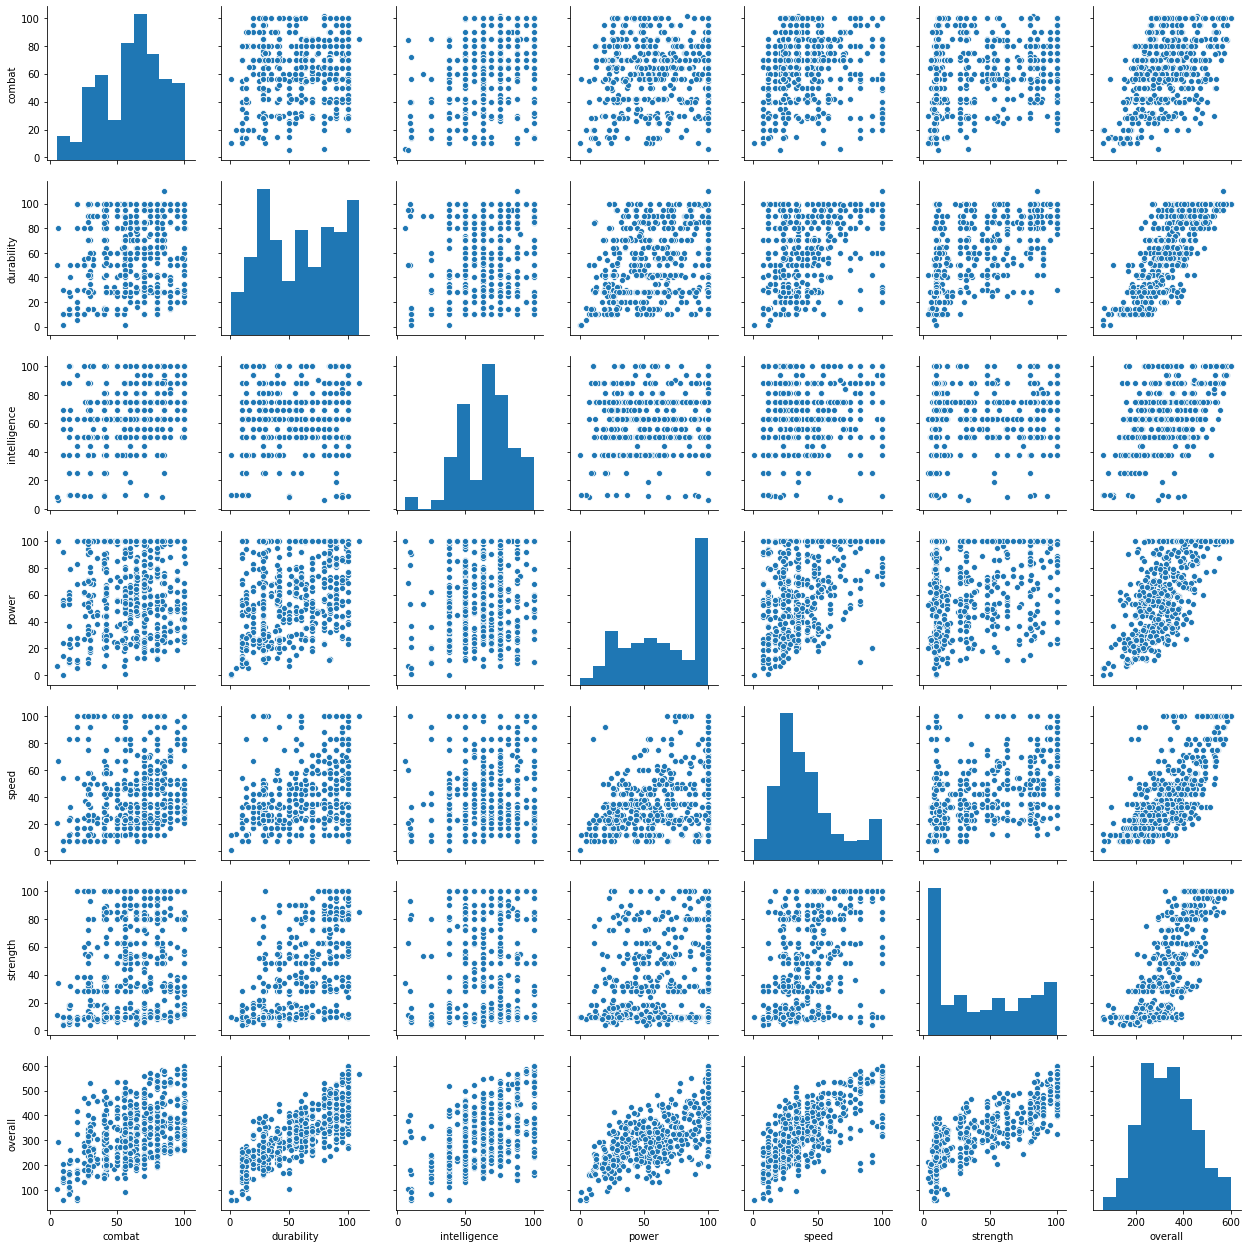

In [21]:
sns.pairplot(powers_df)

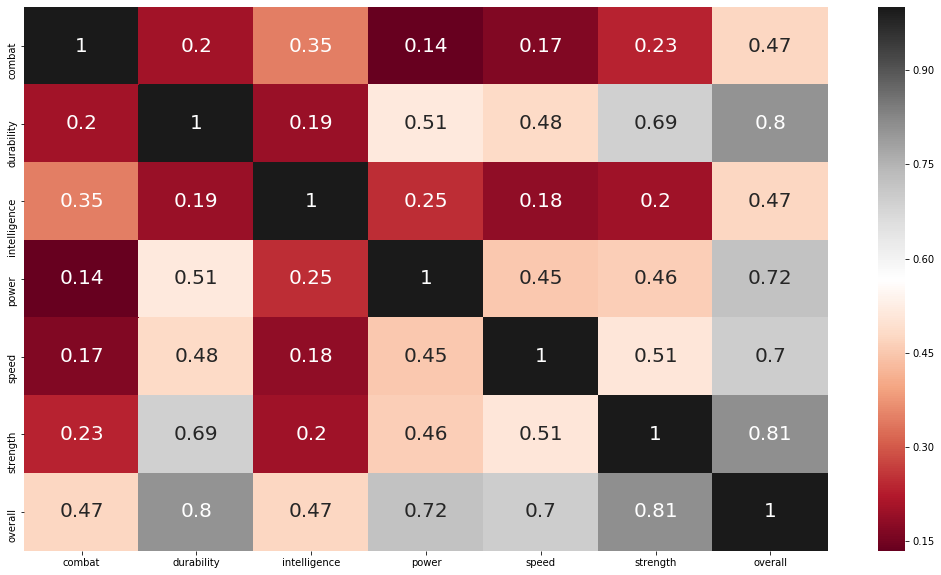

In [22]:
#Creating Subplots
plt.subplots(figsize = (18,10))
#Heatmap showing the correlation between powers 
sns.heatmap(power_corr, annot = True, annot_kws = {'size':20}, cmap="RdGy")

In [23]:
char.head()

,combat,durability,intelligence,name,power,speed,strength,base,id,occupation,relatives,aliases,alignment,alter-egos,full-name,publisher
0,64.0,80.0,38.0,A-Bomb,24.0,17.0,100.0,-,1,"Musician, adventurer, author; formerly talk sh...",Marlo Chandler-Jones (wife); Polly (aunt); Mrs...,['Rick Jones'],good,No alter egos found.,Richard Milhouse Jones,Marvel Comics
1,85.0,65.0,88.0,Abe Sapien,100.0,35.0,28.0,-,2,Paranormal Investigator,"Edith Howard (wife, deceased)","['Langdon Everett Caul', 'Abraham Sapien', 'La...",good,No alter egos found.,Abraham Sapien,Dark Horse Comics
2,65.0,64.0,50.0,Abin Sur,99.0,53.0,90.0,Oa,3,"Green Lantern, former history professor","Amon Sur (son), Arin Sur (sister), Thaal Sines...",['Lagzia'],good,No alter egos found.,NaN,DC Comics
3,95.0,90.0,63.0,Abomination,62.0,53.0,80.0,Mobile,4,Ex-Spy,"Nadia Dornova Blonsky (wife, separated)","['Agent R-7', 'Ravager of Worlds']",bad,No alter egos found.,Emil Blonsky,Marvel Comics
4,55.0,100.0,88.0,Abraxas,100.0,83.0,63.0,-,5,Dimensional destroyer,"Eternity (""Father"")",['-'],bad,No alter egos found.,Abraxas,Marvel Comics


In [25]:
#Creating a dataframe using only features and the outcome 
char = char[['alter-egos'] + ['relatives']
         + ['occupation'] + ['base'] + ['combat'] + ['speed']
         + ['intelligence'] + ['power'] + ['durability'] + ['strength'] 
         + ['publisher'] + ['alignment']]
char.head()

,alter-egos,relatives,occupation,base,combat,speed,intelligence,power,durability,strength,publisher,alignment
0,No alter egos found.,Marlo Chandler-Jones (wife); Polly (aunt); Mrs...,"Musician, adventurer, author; formerly talk sh...",-,64.0,17.0,38.0,24.0,80.0,100.0,Marvel Comics,good
1,No alter egos found.,"Edith Howard (wife, deceased)",Paranormal Investigator,-,85.0,35.0,88.0,100.0,65.0,28.0,Dark Horse Comics,good
2,No alter egos found.,"Amon Sur (son), Arin Sur (sister), Thaal Sines...","Green Lantern, former history professor",Oa,65.0,53.0,50.0,99.0,64.0,90.0,DC Comics,good
3,No alter egos found.,"Nadia Dornova Blonsky (wife, separated)",Ex-Spy,Mobile,95.0,53.0,63.0,62.0,90.0,80.0,Marvel Comics,bad
4,No alter egos found.,"Eternity (""Father"")",Dimensional destroyer,-,55.0,83.0,88.0,100.0,100.0,63.0,Marvel Comics,bad


In [26]:
char['overall'] = powers_df['overall']
char.head()

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,alter-egos,relatives,occupation,base,combat,speed,intelligence,power,durability,strength,publisher,alignment,overall
0,No alter egos found.,Marlo Chandler-Jones (wife); Polly (aunt); Mrs...,"Musician, adventurer, author; formerly talk sh...",-,64.0,17.0,38.0,24.0,80.0,100.0,Marvel Comics,good,323.0
1,No alter egos found.,"Edith Howard (wife, deceased)",Paranormal Investigator,-,85.0,35.0,88.0,100.0,65.0,28.0,Dark Horse Comics,good,401.0
2,No alter egos found.,"Amon Sur (son), Arin Sur (sister), Thaal Sines...","Green Lantern, former history professor",Oa,65.0,53.0,50.0,99.0,64.0,90.0,DC Comics,good,421.0
3,No alter egos found.,"Nadia Dornova Blonsky (wife, separated)",Ex-Spy,Mobile,95.0,53.0,63.0,62.0,90.0,80.0,Marvel Comics,bad,443.0
4,No alter egos found.,"Eternity (""Father"")",Dimensional destroyer,-,55.0,83.0,88.0,100.0,100.0,63.0,Marvel Comics,bad,489.0


In [27]:
char.shape

(774, 13)

In [28]:
#Viewing the count for good guys and bad guys 
char['alignment'].value_counts()

good       534
bad        209
neutral     24
-            7
Name: alignment, dtype: int64

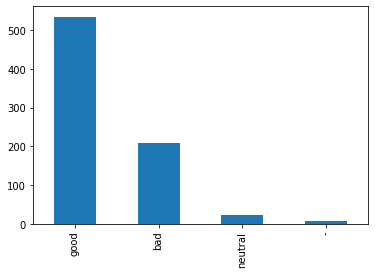

In [29]:
#Viewing the distribution for alignment
char['alignment'].value_counts().plot.bar()

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


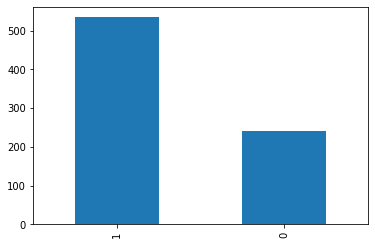

In [30]:
#Making the outcome, alignment, binary. 1 for good or 0 else
char['alignment'] = [1 if x == 'good' else 0 for x in char['alignment']]
char['alignment'].value_counts().plot.bar()

In [31]:
char.head(2)

,alter-egos,relatives,occupation,base,combat,speed,intelligence,power,durability,strength,publisher,alignment,overall
0,No alter egos found.,Marlo Chandler-Jones (wife); Polly (aunt); Mrs...,"Musician, adventurer, author; formerly talk sh...",-,64.0,17.0,38.0,24.0,80.0,100.0,Marvel Comics,1,323.0
1,No alter egos found.,"Edith Howard (wife, deceased)",Paranormal Investigator,-,85.0,35.0,88.0,100.0,65.0,28.0,Dark Horse Comics,1,401.0


In [32]:
# Assigning X as a DataFrame for the features and y as a Series of the outcome variable, Alignment
X = char.drop('alignment', 1)
y = char['alignment']

In [33]:
X.head()

,alter-egos,relatives,occupation,base,combat,speed,intelligence,power,durability,strength,publisher,overall
0,No alter egos found.,Marlo Chandler-Jones (wife); Polly (aunt); Mrs...,"Musician, adventurer, author; formerly talk sh...",-,64.0,17.0,38.0,24.0,80.0,100.0,Marvel Comics,323.0
1,No alter egos found.,"Edith Howard (wife, deceased)",Paranormal Investigator,-,85.0,35.0,88.0,100.0,65.0,28.0,Dark Horse Comics,401.0
2,No alter egos found.,"Amon Sur (son), Arin Sur (sister), Thaal Sines...","Green Lantern, former history professor",Oa,65.0,53.0,50.0,99.0,64.0,90.0,DC Comics,421.0
3,No alter egos found.,"Nadia Dornova Blonsky (wife, separated)",Ex-Spy,Mobile,95.0,53.0,63.0,62.0,90.0,80.0,Marvel Comics,443.0
4,No alter egos found.,"Eternity (""Father"")",Dimensional destroyer,-,55.0,83.0,88.0,100.0,100.0,63.0,Marvel Comics,489.0


## Exploring Alter Egos

In [34]:
X['alter-egos'].head()

0    No alter egos found.
1    No alter egos found.
2    No alter egos found.
3    No alter egos found.
4    No alter egos found.
Name: alter-egos, dtype: object

In [35]:
X['alter-egos'].nunique()

75

In [36]:
X['alter-egos'].unique()

array(['No alter egos found.', 'Sharon Carter', 'Archangel', 'Tempest',
       'Giant-Man, Goliath, Wasp II, Yellowjacket', 'Toxin, Venom',
       'Angel', 'Speedy', 'Goliath, Power Man, Smuggler', 'Spectre',
       'Oracle', 'Hawkfire', 'Huntress', 'Misfit', 'Spoiler',
       'Nightwing, Robin', 'Captain Marvel, Warbird', 'Vertigo II',
       'Meltdown', 'Gemini V', 'Binary, Warbird',
       'Evil Deadpool, Venompool', 'Deadpool, Venompool', 'Black Racer',
       'Speed Demon', 'Impulse, Kid Flash II',
       'Ant-Man, Goliath, Wasp II, Yellowjacket',
       'Atlas, Power Man, Smuggler', 'Hawkeye, Ronin',
       'Ant-Man, Giant-Man, Wasp II, Yellowjacket', 'Goliath, Ronin',
       'Batgirl III', 'Flash IV, Kid Flash II',
       'Phoenix, White Phoenix of The Crown', 'Liberty Belle II',
       'Power Woman', 'Iron Lad', 'Flash IV, Impulse', 'Power Man',
       'Boom-Boom', 'Batgirl V', 'She-Thing', 'Batman II, Robin',
       'Batgirl', 'Speedball', 'Jean Grey, White Phoenix of The Crow

In [37]:
X['alter-egos'].isnull().sum()

0

In [38]:
X['alter-egos'].value_counts()

No alter egos found.                         686
Atlas, Power Man, Smuggler                     3
Ant-Man, Giant-Man, Wasp II, Yellowjacket      3
Hawkeye, Ronin                                 3
Hawkfire                                       2
Binary, Warbird                                2
Vindicator II                                  2
Arsenal                                        2
Goliath, Power Man, Smuggler                   2
Oracle                                         2
Anti-Venom, Venom                              2
Archangel                                      2
Rune King Thor                                 1
Flash IV, Kid Flash II                         1
Power Man                                      1
Scarlet Spider                                 1
She-Thing                                      1
Vertigo II                                     1
Binary, Captain Marvel                         1
Black Racer                                    1
Nightwing, Robin    

In [39]:
#Making the alter-egos feature binary where 1 represents if the character has a known alter-ego and 0 else
X['alter-egos'] = [0 if x == 'No alter egos found.' else 1 for x in X['alter-egos']]
X.head()

,alter-egos,relatives,occupation,base,combat,speed,intelligence,power,durability,strength,publisher,overall
0,0,Marlo Chandler-Jones (wife); Polly (aunt); Mrs...,"Musician, adventurer, author; formerly talk sh...",-,64.0,17.0,38.0,24.0,80.0,100.0,Marvel Comics,323.0
1,0,"Edith Howard (wife, deceased)",Paranormal Investigator,-,85.0,35.0,88.0,100.0,65.0,28.0,Dark Horse Comics,401.0
2,0,"Amon Sur (son), Arin Sur (sister), Thaal Sines...","Green Lantern, former history professor",Oa,65.0,53.0,50.0,99.0,64.0,90.0,DC Comics,421.0
3,0,"Nadia Dornova Blonsky (wife, separated)",Ex-Spy,Mobile,95.0,53.0,63.0,62.0,90.0,80.0,Marvel Comics,443.0
4,0,"Eternity (""Father"")",Dimensional destroyer,-,55.0,83.0,88.0,100.0,100.0,63.0,Marvel Comics,489.0


In [40]:
X['alter-egos'].value_counts()

0    686
1     88
Name: alter-egos, dtype: int64

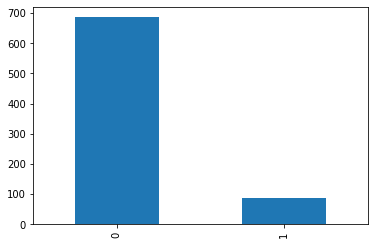

In [41]:
X['alter-egos'].value_counts().plot.bar()

In [42]:
X.head()

,alter-egos,relatives,occupation,base,combat,speed,intelligence,power,durability,strength,publisher,overall
0,0,Marlo Chandler-Jones (wife); Polly (aunt); Mrs...,"Musician, adventurer, author; formerly talk sh...",-,64.0,17.0,38.0,24.0,80.0,100.0,Marvel Comics,323.0
1,0,"Edith Howard (wife, deceased)",Paranormal Investigator,-,85.0,35.0,88.0,100.0,65.0,28.0,Dark Horse Comics,401.0
2,0,"Amon Sur (son), Arin Sur (sister), Thaal Sines...","Green Lantern, former history professor",Oa,65.0,53.0,50.0,99.0,64.0,90.0,DC Comics,421.0
3,0,"Nadia Dornova Blonsky (wife, separated)",Ex-Spy,Mobile,95.0,53.0,63.0,62.0,90.0,80.0,Marvel Comics,443.0
4,0,"Eternity (""Father"")",Dimensional destroyer,-,55.0,83.0,88.0,100.0,100.0,63.0,Marvel Comics,489.0


## Exploring Relatives

In [43]:
X['relatives'].head()

0    Marlo Chandler-Jones (wife); Polly (aunt); Mrs...
1                        Edith Howard (wife, deceased)
2    Amon Sur (son), Arin Sur (sister), Thaal Sines...
3              Nadia Dornova Blonsky (wife, separated)
4                                  Eternity ("Father")
Name: relatives, dtype: object

In [44]:
X['relatives'].nunique()

459

In [45]:
X['relatives'].unique()[0:5]

array(['Marlo Chandler-Jones (wife); Polly (aunt); Mrs. Chandler (mother-in-law); Keith Chandler, Ray Chandler, three unidentified others (brothers-in-law); unidentified father (deceased); Jackie Shorr (alleged mother; unconfirmed)',
       'Edith Howard (wife, deceased)',
       'Amon Sur (son), Arin Sur (sister), Thaal Sinestro (brother-in-law), Soranik Natu (niece)',
       'Nadia Dornova Blonsky (wife, separated)', 'Eternity ("Father")'],
      dtype=object)

In [46]:
X['relatives'].isnull().sum()

0

In [47]:
X['relatives'].value_counts()[0:2]

-                                                                                                                                                                                                    286
Richard Parker (father, deceased), Mary Parker(mother, deceased), Benjamin Parker (uncle, deceased), May Parker (aunt), Mary Jane Watson-Parker (wife), May Parker (daughter, allegedly deceased)      3
Name: relatives, dtype: int64

In [48]:
#Making the relatives feature binary where 1 represents relatives and 0 for no known relatives
X['relatives'] = [0 if x == '-' else 1 for x in X['relatives']]
X['relatives'].head(10)

0    1
1    1
2    1
3    1
4    1
5    1
6    0
7    1
8    1
9    1
Name: relatives, dtype: int64

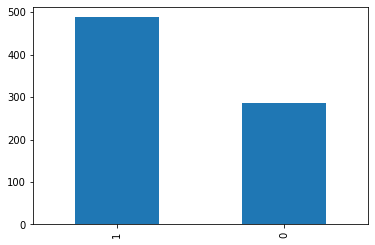

In [49]:
#Viewing the distribution of the new relatives feature
X['relatives'].value_counts().plot.bar()

## Exploring Occupation

In [50]:
X['occupation'].head()

0    Musician, adventurer, author; formerly talk sh...
1                              Paranormal Investigator
2              Green Lantern, former history professor
3                                               Ex-Spy
4                                Dimensional destroyer
Name: occupation, dtype: object

In [51]:
X['occupation'].nunique()

386

In [52]:
X['occupation'].unique()[0:3]

array(['Musician, adventurer, author; formerly talk show host',
       'Paranormal Investigator',
       'Green Lantern, former history professor'], dtype=object)

In [53]:
X['occupation'].isnull().sum()

0

In [54]:
X['occupation'].value_counts()

-                                                                                                                                                              312
Adventurer                                                                                                                                                      17
Student                                                                                                                                                         10
Scientist                                                                                                                                                        5
Professional criminal                                                                                                                                            4
Professional Criminal                                                                                                                                            4
Former National Aerona

In [55]:
#Making the occupation feature binary.  1 for known occupation, 0 for unkwown legal occupation
X['occupation'] = [0 if x == '-' else 1 for x in X['occupation']]
X['occupation'].head(15)

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    0
13    0
14    0
Name: occupation, dtype: int64

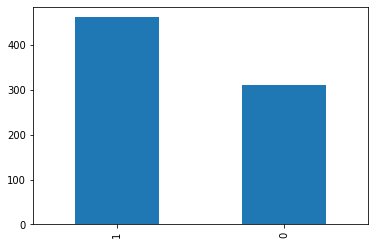

In [69]:
X['occupation'].value_counts().plot.bar()

In [70]:
X.head()

,alter-egos,relatives,occupation,base,combat,speed,intelligence,power,durability,strength,publisher,overall
0,0,1,1,0,64.0,17.0,38.0,24.0,80.0,100.0,Marvel Comics,323.0
1,0,1,1,0,85.0,35.0,88.0,100.0,65.0,28.0,Dark Horse Comics,401.0
2,0,1,1,1,65.0,53.0,50.0,99.0,64.0,90.0,DC Comics,421.0
3,0,1,1,1,95.0,53.0,63.0,62.0,90.0,80.0,Marvel Comics,443.0
4,0,1,1,0,55.0,83.0,88.0,100.0,100.0,63.0,Marvel Comics,489.0


## Exploring Base

In [71]:
X['base'].head()

0    0
1    0
2    1
3    1
4    0
Name: base, dtype: int64

In [72]:
X['base'].nunique()

2

In [60]:
X['base'].value_counts()

-                                                                                                                                                                                                                                                                 401
Gotham City                                                                                                                                                                                                                                                        11
New York City                                                                                                                                                                                                                                                      10
New York, New York                                                                                                                                                                                                    

In [61]:
#Making the base feature binary.  1 for having a base, 0 for no known base
X['base'] = [0 if x == '-' else 1 for x in X['base']]
X['base'].head(5)

0    0
1    0
2    1
3    1
4    0
Name: base, dtype: int64

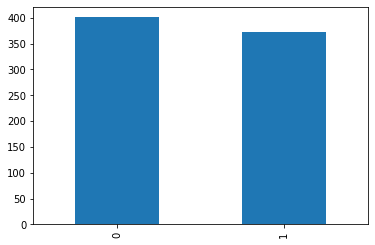

In [62]:
X['base'].value_counts().plot.bar()

### How much of the data is missing?

In [2]:
#How much of the remaining data is missing?
X.isnull().sum().sort_values(ascending=False)

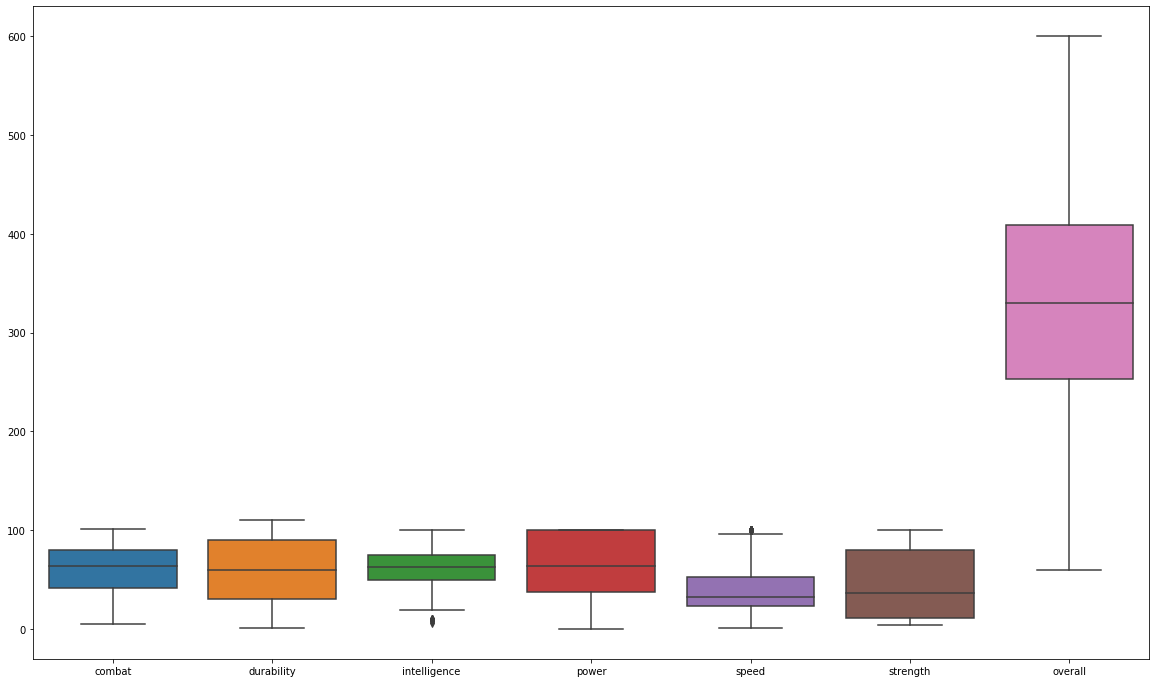

In [67]:
#Viewing the powerstat distribution
plt.subplots(figsize = (20,12))
sns.boxplot(data = powers_df)

In [115]:
#columns dropped for Imputation of values
dfi = X[['name', 'publisher']]
dfi.head()

,name,publisher
0,A-Bomb,Marvel Comics
1,Abe Sapien,Dark Horse Comics
2,Abin Sur,DC Comics
3,Abomination,Marvel Comics
4,Abraxas,Marvel Comics


In [563]:
#Seperating the features from the outcome
X = X.drop(['y'], axis = 1)
X.head()

,alter-egos,relatives,occupation,base,combat,speed,intelligence,power,durability,strength,publisher,overall
0,0.0,1.0,1.0,0.0,64.0,17.0,38.0,24.0,80.0,100.0,0,323.0
1,0.0,1.0,1.0,0.0,85.0,35.0,88.0,100.0,65.0,28.0,2,401.0
2,0.0,1.0,1.0,1.0,65.0,53.0,50.0,99.0,64.0,90.0,1,421.0
3,0.0,1.0,1.0,1.0,95.0,53.0,63.0,62.0,90.0,80.0,0,443.0
4,0.0,1.0,1.0,0.0,55.0,83.0,88.0,100.0,100.0,63.0,0,489.0


In [117]:
#Creating a list of features to dummy
todummy_list = []
todummy_list.append('publisher')

In [118]:
todummy_list

['publisher']

In [120]:
#Imputing missing powerstat values with the median value of each feature
from sklearn.impute import SimpleImputer
imp_median = SimpleImputer(missing_values = np.nan, strategy = 'median')
imp_median.fit(X)
X = pd.DataFrame(data = imp_median.transform(X) , columns=X.columns)
X.head(5)

,alter-egos,relatives,occupation,base,combat,speed,intelligence,power,durability,strength
0,0.0,1.0,1.0,0.0,64.0,17.0,38.0,24.0,80.0,100.0
1,0.0,1.0,1.0,0.0,85.0,35.0,88.0,100.0,65.0,28.0
2,0.0,1.0,1.0,1.0,65.0,53.0,50.0,99.0,64.0,90.0
3,0.0,1.0,1.0,1.0,95.0,53.0,63.0,62.0,90.0,80.0
4,0.0,1.0,1.0,0.0,55.0,83.0,88.0,100.0,100.0,63.0


In [140]:
X.isnull().sum().sort_values(ascending=False)

publisher       0
strength        0
durability      0
power           0
intelligence    0
speed           0
combat          0
base            0
occupation      0
relatives       0
alter-egos      0
dtype: int64

## Exploring Publisher

In [122]:
X.head()

,alter-egos,relatives,occupation,base,combat,speed,intelligence,power,durability,strength
0,0.0,1.0,1.0,0.0,64.0,17.0,38.0,24.0,80.0,100.0
1,0.0,1.0,1.0,0.0,85.0,35.0,88.0,100.0,65.0,28.0
2,0.0,1.0,1.0,1.0,65.0,53.0,50.0,99.0,64.0,90.0
3,0.0,1.0,1.0,1.0,95.0,53.0,63.0,62.0,90.0,80.0
4,0.0,1.0,1.0,0.0,55.0,83.0,88.0,100.0,100.0,63.0


In [123]:
dfi['publisher'].nunique()

88

In [124]:
dfi['publisher'].unique()

array(['Marvel Comics', 'Dark Horse Comics', 'DC Comics', 'NBC - Heroes',
       'Sharon Carter', 'Wildstorm', 'Archangel', 'Tempest',
       'Image Comics', 'Giant-Man', 'Toxin', 'Angel', 'Speedy', nan,
       'Goliath', 'Spectre', 'Oracle', 'Hawkfire', 'Huntress', 'Misfit',
       'Spoiler', 'Nightwing', 'Icon Comics', 'SyFy', 'Captain Marvel',
       'Hanna-Barbera', 'Vertigo II', 'George Lucas', 'Meltdown',
       'Gemini V', 'Team Epic TV', 'South Park', 'Binary',
       'HarperCollins', 'ABC Studios', 'Universal Studios', 'Star Trek',
       'Evil Deadpool', 'IDW Publishing', 'Deadpool', 'Black Racer',
       'Speed Demon', 'Impulse', 'Ant-Man', 'Shueisha', 'Atlas',
       'Hawkeye', 'Sony Pictures', 'J. K. Rowling', 'Batgirl III',
       'Flash IV', 'Titan Books', 'Phoenix', 'Liberty Belle II',
       'Power Woman', 'Rebellion', 'Iron Lad', 'Power Man', 'Microsoft',
       'Boom-Boom', 'Batgirl V', 'She-Thing', 'Batman II', 'Batgirl',
       'Speedball', 'Jean Grey', 'Luke Cage'

In [125]:
dfi['publisher'].value_counts()[0:7]

Marvel Comics        354
DC Comics            201
Dark Horse Comics     19
NBC - Heroes          18
Image Comics          14
George Lucas          14
Star Trek              6
Name: publisher, dtype: int64

In [580]:
dfi['publisher'].value_counts()

0    354
2    219
1    201
Name: publisher, dtype: int64

In [126]:
#Splitting the publisher feature into 3 categories  1 for having a base, 0 for no known base
dfi['publisher'] = [0 if x == 'Marvel Comics' else 1 if x == 'DC Comics' else 2 for x in dfi['publisher']]
dfi['publisher'].head()

0    0
1    2
2    1
3    0
4    0
Name: publisher, dtype: int64

In [128]:
X['publisher'] = dfi['publisher']
X.head()

,alter-egos,relatives,occupation,base,combat,speed,intelligence,power,durability,strength,publisher
0,0.0,1.0,1.0,0.0,64.0,17.0,38.0,24.0,80.0,100.0,0
1,0.0,1.0,1.0,0.0,85.0,35.0,88.0,100.0,65.0,28.0,2
2,0.0,1.0,1.0,1.0,65.0,53.0,50.0,99.0,64.0,90.0,1
3,0.0,1.0,1.0,1.0,95.0,53.0,63.0,62.0,90.0,80.0,0
4,0.0,1.0,1.0,0.0,55.0,83.0,88.0,100.0,100.0,63.0,0


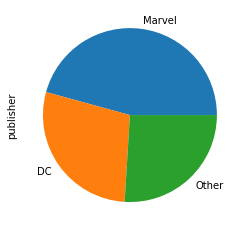

In [129]:
X['publisher'].value_counts().plot.pie(labels = ['Marvel','DC','Other'])

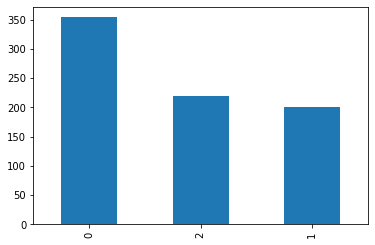

In [130]:
X['publisher'].value_counts().plot.bar()

In [131]:
todummy_list

['publisher']

In [256]:
# Dummying the publishers
def dummy_df(df, todummy_list):
    for x in todummy_list:
        dummies = pd.get_dummies(df[x], prefix=x, dummy_na=False)
        df = df.drop(x, 1)
        df = pd.concat([df, dummies], axis=1)
    return df

## Adding the Overall Stat

In [3]:
X_real = X
X_real.head()

In [4]:
X_real['overall'] = X_real['combat'] + X_real['speed'] + X_real['intelligence'] + X_real['power'] + X_real['durability'] + X_real['strength']
X_real['overall']

In [144]:
X_real.head()

,alter-egos,relatives,occupation,base,combat,speed,intelligence,power,durability,strength,publisher,overall
0,0.0,1.0,1.0,0.0,64.0,17.0,38.0,24.0,80.0,100.0,0,323.0
1,0.0,1.0,1.0,0.0,85.0,35.0,88.0,100.0,65.0,28.0,2,401.0
2,0.0,1.0,1.0,1.0,65.0,53.0,50.0,99.0,64.0,90.0,1,421.0
3,0.0,1.0,1.0,1.0,95.0,53.0,63.0,62.0,90.0,80.0,0,443.0
4,0.0,1.0,1.0,0.0,55.0,83.0,88.0,100.0,100.0,63.0,0,489.0


In [571]:
X = X_real
X.head()

,alter-egos,relatives,occupation,base,combat,speed,intelligence,power,durability,strength,publisher,overall,y
0,0.0,1.0,1.0,0.0,64.0,17.0,38.0,24.0,80.0,100.0,0,323.0,1
1,0.0,1.0,1.0,0.0,85.0,35.0,88.0,100.0,65.0,28.0,2,401.0,1
2,0.0,1.0,1.0,1.0,65.0,53.0,50.0,99.0,64.0,90.0,1,421.0,1
3,0.0,1.0,1.0,1.0,95.0,53.0,63.0,62.0,90.0,80.0,0,443.0,0
4,0.0,1.0,1.0,0.0,55.0,83.0,88.0,100.0,100.0,63.0,0,489.0,0


In [575]:
X = X.drop('y', axis = 1)
X.head()

,alter-egos,relatives,occupation,base,combat,speed,intelligence,power,durability,strength,publisher,overall
0,0.0,1.0,1.0,0.0,64.0,17.0,38.0,24.0,80.0,100.0,0,323.0
1,0.0,1.0,1.0,0.0,85.0,35.0,88.0,100.0,65.0,28.0,2,401.0
2,0.0,1.0,1.0,1.0,65.0,53.0,50.0,99.0,64.0,90.0,1,421.0
3,0.0,1.0,1.0,1.0,95.0,53.0,63.0,62.0,90.0,80.0,0,443.0
4,0.0,1.0,1.0,0.0,55.0,83.0,88.0,100.0,100.0,63.0,0,489.0


In [572]:
X.shape

(774, 13)

In [262]:
todummy_list

['publisher']

In [263]:
X = dummy_df(X, todummy_list)
X.head()

,alter-egos,relatives,occupation,base,combat,speed,intelligence,power,durability,strength,publisher,overall
0,0.0,1.0,1.0,0.0,64.0,17.0,38.0,24.0,80.0,100.0,0,323.0
1,0.0,1.0,1.0,0.0,85.0,35.0,88.0,100.0,65.0,28.0,2,401.0
2,0.0,1.0,1.0,1.0,65.0,53.0,50.0,99.0,64.0,90.0,1,421.0
3,0.0,1.0,1.0,1.0,95.0,53.0,63.0,62.0,90.0,80.0,0,443.0
4,0.0,1.0,1.0,0.0,55.0,83.0,88.0,100.0,100.0,63.0,0,489.0


In [5]:
X = X.drop('y')
X.head()

In [439]:
#Histogram function

def plot_histogram(x):
    plt.hist(x, color = 'lightgreen')
    plt.title("Histogram of '{var_name}'".format(var_name=x.name))
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.show()

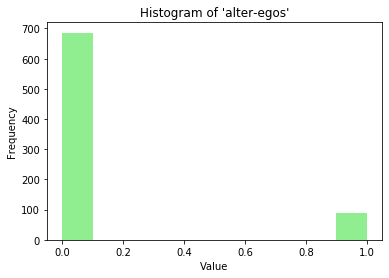

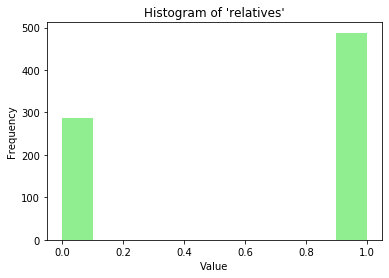

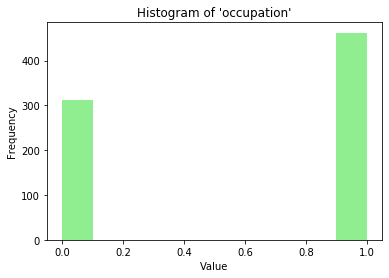

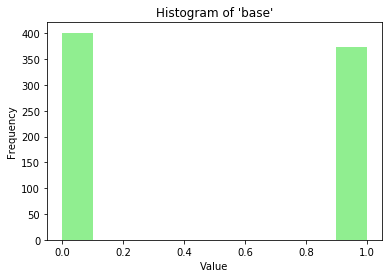

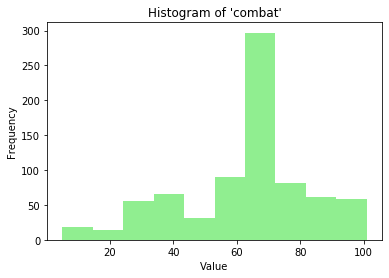

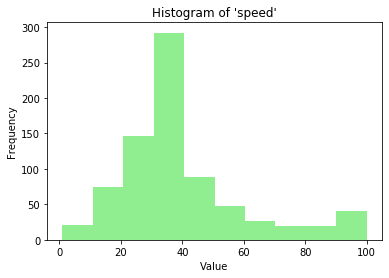

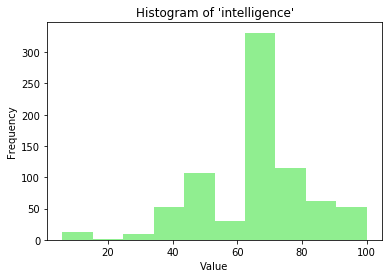

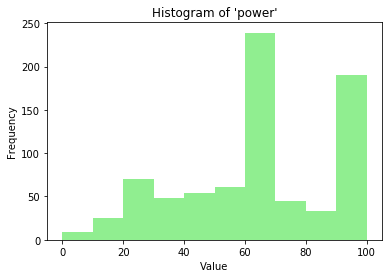

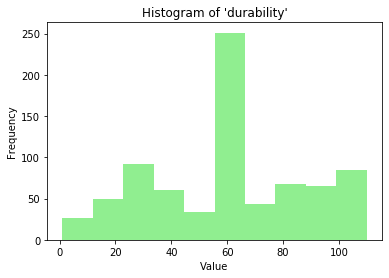

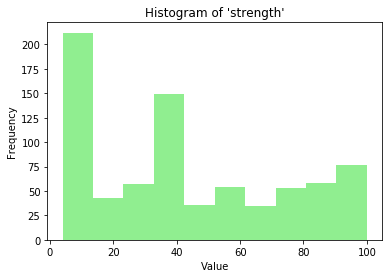

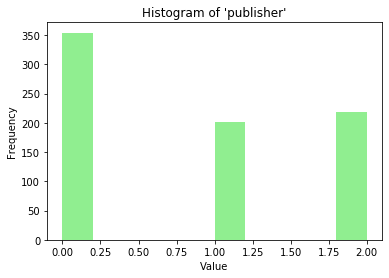

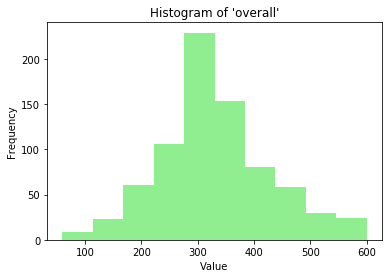

In [440]:
plot_histogram(X_real['alter-egos'])
plot_histogram(X_real['relatives'])
plot_histogram(X_real['occupation'])
plot_histogram(X_real['base'])
plot_histogram(X_real['combat'])
plot_histogram(X_real['speed'])
plot_histogram(X_real['intelligence'])
plot_histogram(X_real['power'])
plot_histogram(X_real['durability'])
plot_histogram(X_real['strength'])
plot_histogram(X_real['publisher'])
plot_histogram(X_real['overall'])

In [583]:
# Plot histograms to show distribution of features by outcome categories
def plot_histogram_dv(x,y):
    plt.hist(list(x[y==0]), color = 'gray', label='Hero', alpha= 0.5, stacked = True, density = True)
    plt.hist(list(x[y==1]), color = 'lightgreen', label ='Villain', alpha= 0.3, stacked = True, density = True)
    plt.title("Histogram of '{var_name}' by Outcome Category".format(var_name=x.name))
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.legend(loc='upper right')
    plt.show()

In [394]:
X.head()

,alter-egos,relatives,occupation,base,combat,speed,intelligence,power,durability,strength,...,intelligence_power,intelligence_speed,intelligence_strength,power_speed,power_strength,speed_strength,publisher_0,publisher_1,publisher_2,y
0,0.0,1.0,1.0,0.0,64.0,17.0,38.0,24.0,80.0,100.0,...,912.0,646.0,3800.0,408.0,2400.0,1700.0,1,0,0,1
1,0.0,1.0,1.0,0.0,85.0,35.0,88.0,100.0,65.0,28.0,...,8800.0,3080.0,2464.0,3500.0,2800.0,980.0,0,0,1,1
2,0.0,1.0,1.0,1.0,65.0,53.0,50.0,99.0,64.0,90.0,...,4950.0,2650.0,4500.0,5247.0,8910.0,4770.0,0,1,0,1
3,0.0,1.0,1.0,1.0,95.0,53.0,63.0,62.0,90.0,80.0,...,3906.0,3339.0,5040.0,3286.0,4960.0,4240.0,1,0,0,0
4,0.0,1.0,1.0,0.0,55.0,83.0,88.0,100.0,100.0,63.0,...,8800.0,7304.0,5544.0,8300.0,6300.0,5229.0,1,0,0,0


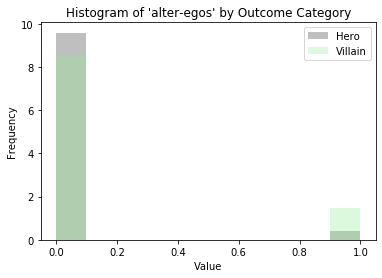

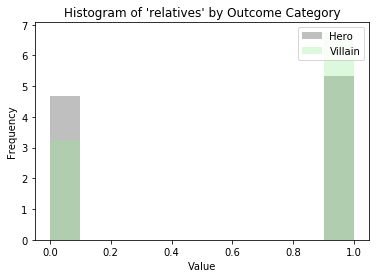

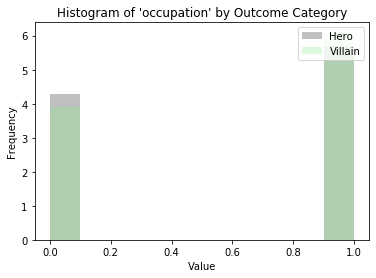

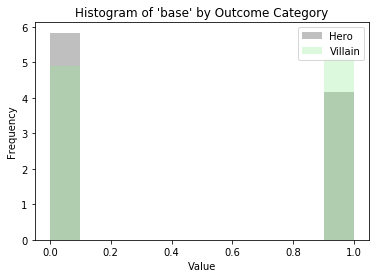

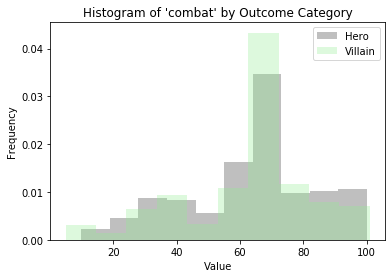

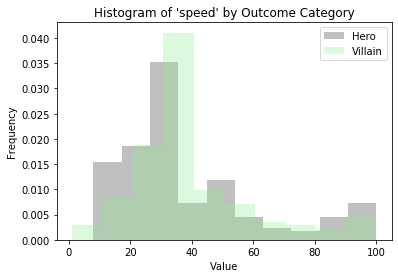

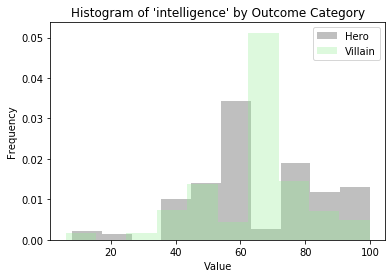

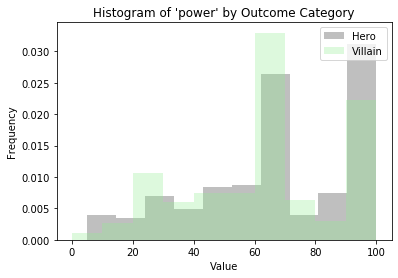

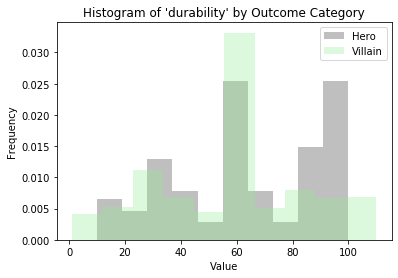

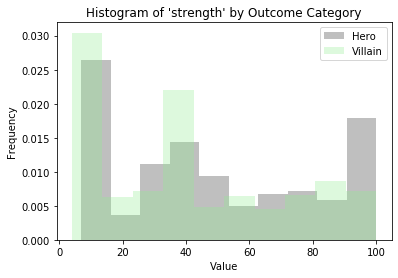

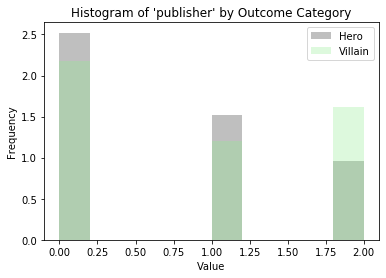

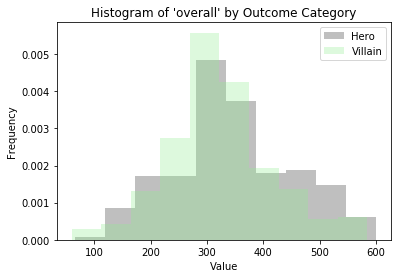

In [584]:
plot_histogram_dv(X['alter-egos'], y)
plot_histogram_dv(X['relatives'], y)
plot_histogram_dv(X['occupation'], y)
plot_histogram_dv(X['base'], y)
plot_histogram_dv(X['combat'], y)
plot_histogram_dv(X['speed'], y)
plot_histogram_dv(X['intelligence'], y)
plot_histogram_dv(X['power'], y)
plot_histogram_dv(X['durability'], y)
plot_histogram_dv(X['strength'], y)
plot_histogram_dv(X_real['publisher'], y)
plot_histogram_dv(X_real['overall'], y)

In [264]:
X.head()

,alter-egos,relatives,occupation,base,combat,speed,intelligence,power,durability,strength,publisher,overall
0,0.0,1.0,1.0,0.0,64.0,17.0,38.0,24.0,80.0,100.0,0,323.0
1,0.0,1.0,1.0,0.0,85.0,35.0,88.0,100.0,65.0,28.0,2,401.0
2,0.0,1.0,1.0,1.0,65.0,53.0,50.0,99.0,64.0,90.0,1,421.0
3,0.0,1.0,1.0,1.0,95.0,53.0,63.0,62.0,90.0,80.0,0,443.0
4,0.0,1.0,1.0,0.0,55.0,83.0,88.0,100.0,100.0,63.0,0,489.0


## Creating New Features

In [566]:
# Using PolynomialFeatures in sklearn.preprocessing to create two-way interactions for all numerical 
#features
from itertools import combinations
from sklearn.preprocessing import PolynomialFeatures

def add_interactions(df):
    # Get feature names
    combos = list(combinations(list(df.columns), 2))
    colnames = list(df.columns) + ['_'.join(x) for x in combos]
    
    # Find interactions
    poly = PolynomialFeatures(interaction_only=True, include_bias=False)
    df = poly.fit_transform(df)
    df = pd.DataFrame(df)
    df.columns = colnames
    
    # Remove interaction terms with all 0 values            
    noint_indicies = [i for i, x in enumerate(list((df == 0).all())) if x]
    df = df.drop(df.columns[noint_indicies], axis=1)
    
    return df

In [576]:
X = add_interactions(X)
X.head()

,alter-egos,relatives,occupation,base,combat,speed,intelligence,power,durability,strength,...,power_durability,power_strength,power_publisher,power_overall,durability_strength,durability_publisher,durability_overall,strength_publisher,strength_overall,publisher_overall
0,0.0,1.0,1.0,0.0,64.0,17.0,38.0,24.0,80.0,100.0,...,1920.0,2400.0,0.0,7752.0,8000.0,0.0,25840.0,0.0,32300.0,0.0
1,0.0,1.0,1.0,0.0,85.0,35.0,88.0,100.0,65.0,28.0,...,6500.0,2800.0,200.0,40100.0,1820.0,130.0,26065.0,56.0,11228.0,802.0
2,0.0,1.0,1.0,1.0,65.0,53.0,50.0,99.0,64.0,90.0,...,6336.0,8910.0,99.0,41679.0,5760.0,64.0,26944.0,90.0,37890.0,421.0
3,0.0,1.0,1.0,1.0,95.0,53.0,63.0,62.0,90.0,80.0,...,5580.0,4960.0,0.0,27466.0,7200.0,0.0,39870.0,0.0,35440.0,0.0
4,0.0,1.0,1.0,0.0,55.0,83.0,88.0,100.0,100.0,63.0,...,10000.0,6300.0,0.0,48900.0,6300.0,0.0,48900.0,0.0,30807.0,0.0


In [578]:
X.T

,0,1,2,3,4,5,6,7,8,9,...,764,765,766,767,768,769,770,771,772,773
alter-egos,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
relatives,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,...,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
occupation,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
base,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,...,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0
combat,64.0,85.0,65.0,95.0,55.0,64.0,64.0,50.0,64.0,20.0,...,95.0,84.0,64.0,14.0,28.0,28.0,90.0,56.0,28.0,64.0
speed,17.0,35.0,53.0,53.0,83.0,25.0,12.0,33.0,33.0,13.0,...,42.0,53.0,33.0,12.0,35.0,27.0,33.0,23.0,100.0,58.0
intelligence,38.0,88.0,50.0,63.0,88.0,38.0,63.0,69.0,63.0,10.0,...,75.0,88.0,63.0,88.0,50.0,50.0,88.0,81.0,50.0,100.0
power,24.0,100.0,99.0,62.0,100.0,98.0,100.0,37.0,64.0,5.0,...,55.0,100.0,64.0,12.0,31.0,98.0,100.0,100.0,100.0,100.0
durability,80.0,65.0,64.0,90.0,100.0,100.0,100.0,40.0,60.0,5.0,...,100.0,95.0,60.0,28.0,28.0,100.0,25.0,28.0,28.0,85.0
strength,100.0,28.0,90.0,80.0,63.0,80.0,10.0,10.0,46.0,8.0,...,24.0,53.0,37.0,10.0,10.0,100.0,52.0,10.0,10.0,85.0


In [559]:
X.columns

Index(['alter-egos', 'relatives', 'occupation', 'base', 'combat', 'speed',
       'intelligence', 'power', 'durability', 'strength', 'publisher',
       'overall', 'y', 'alter-egos_relatives', 'alter-egos_occupation',
       'alter-egos_base', 'alter-egos_combat', 'alter-egos_speed',
       'alter-egos_intelligence', 'alter-egos_power', 'alter-egos_durability',
       'alter-egos_strength', 'alter-egos_publisher', 'alter-egos_overall',
       'alter-egos_y', 'relatives_occupation', 'relatives_base',
       'relatives_combat', 'relatives_speed', 'relatives_intelligence',
       'relatives_power', 'relatives_durability', 'relatives_strength',
       'relatives_publisher', 'relatives_overall', 'relatives_y',
       'occupation_base', 'occupation_combat', 'occupation_speed',
       'occupation_intelligence', 'occupation_power', 'occupation_durability',
       'occupation_strength', 'occupation_publisher', 'occupation_overall',
       'occupation_y', 'base_combat', 'base_speed', 'base_intel

In [226]:
X.shape

(774, 12)

In [266]:
X_powers.isnull().sum()

combat          0
durability      0
intelligence    0
power           0
speed           0
strength        0
dtype: int64

In [267]:
#Adding interactions for continuous variables, (powerstats)
X_powers_interactions = add_interactions(X_powers)
X_powers_interactions.head()

,combat,durability,intelligence,power,speed,strength,combat_durability,combat_intelligence,combat_power,combat_speed,...,durability_intelligence,durability_power,durability_speed,durability_strength,intelligence_power,intelligence_speed,intelligence_strength,power_speed,power_strength,speed_strength
0,64.0,80.0,38.0,24.0,17.0,100.0,5120.0,2432.0,1536.0,1088.0,...,3040.0,1920.0,1360.0,8000.0,912.0,646.0,3800.0,408.0,2400.0,1700.0
1,85.0,65.0,88.0,100.0,35.0,28.0,5525.0,7480.0,8500.0,2975.0,...,5720.0,6500.0,2275.0,1820.0,8800.0,3080.0,2464.0,3500.0,2800.0,980.0
2,65.0,64.0,50.0,99.0,53.0,90.0,4160.0,3250.0,6435.0,3445.0,...,3200.0,6336.0,3392.0,5760.0,4950.0,2650.0,4500.0,5247.0,8910.0,4770.0
3,95.0,90.0,63.0,62.0,53.0,80.0,8550.0,5985.0,5890.0,5035.0,...,5670.0,5580.0,4770.0,7200.0,3906.0,3339.0,5040.0,3286.0,4960.0,4240.0
4,55.0,100.0,88.0,100.0,83.0,63.0,5500.0,4840.0,5500.0,4565.0,...,8800.0,10000.0,8300.0,6300.0,8800.0,7304.0,5544.0,8300.0,6300.0,5229.0


In [270]:
x = X_powers_interactions
x.head()

,combat,durability,intelligence,power,speed,strength,combat_durability,combat_intelligence,combat_power,combat_speed,...,durability_intelligence,durability_power,durability_speed,durability_strength,intelligence_power,intelligence_speed,intelligence_strength,power_speed,power_strength,speed_strength
0,64.0,80.0,38.0,24.0,17.0,100.0,5120.0,2432.0,1536.0,1088.0,...,3040.0,1920.0,1360.0,8000.0,912.0,646.0,3800.0,408.0,2400.0,1700.0
1,85.0,65.0,88.0,100.0,35.0,28.0,5525.0,7480.0,8500.0,2975.0,...,5720.0,6500.0,2275.0,1820.0,8800.0,3080.0,2464.0,3500.0,2800.0,980.0
2,65.0,64.0,50.0,99.0,53.0,90.0,4160.0,3250.0,6435.0,3445.0,...,3200.0,6336.0,3392.0,5760.0,4950.0,2650.0,4500.0,5247.0,8910.0,4770.0
3,95.0,90.0,63.0,62.0,53.0,80.0,8550.0,5985.0,5890.0,5035.0,...,5670.0,5580.0,4770.0,7200.0,3906.0,3339.0,5040.0,3286.0,4960.0,4240.0
4,55.0,100.0,88.0,100.0,83.0,63.0,5500.0,4840.0,5500.0,4565.0,...,8800.0,10000.0,8300.0,6300.0,8800.0,7304.0,5544.0,8300.0,6300.0,5229.0


In [278]:
X.head()

,alter-egos,relatives,occupation,base,combat,speed,intelligence,power,durability,strength,publisher,overall
0,0.0,1.0,1.0,0.0,64.0,17.0,38.0,24.0,80.0,100.0,0,323.0
1,0.0,1.0,1.0,0.0,85.0,35.0,88.0,100.0,65.0,28.0,2,401.0
2,0.0,1.0,1.0,1.0,65.0,53.0,50.0,99.0,64.0,90.0,1,421.0
3,0.0,1.0,1.0,1.0,95.0,53.0,63.0,62.0,90.0,80.0,0,443.0
4,0.0,1.0,1.0,0.0,55.0,83.0,88.0,100.0,100.0,63.0,0,489.0


In [400]:
#Combining both sets of feature stats
X = pd.concat([X,X_powers_interactions], axis=1, ignore_index = False)
X.head()

,alter-egos,relatives,occupation,base,combat,speed,intelligence,power,durability,strength,...,durability_intelligence,durability_power,durability_speed,durability_strength,intelligence_power,intelligence_speed,intelligence_strength,power_speed,power_strength,speed_strength
0,0.0,1.0,1.0,0.0,64.0,17.0,38.0,24.0,80.0,100.0,...,3040.0,1920.0,1360.0,8000.0,912.0,646.0,3800.0,408.0,2400.0,1700.0
1,0.0,1.0,1.0,0.0,85.0,35.0,88.0,100.0,65.0,28.0,...,5720.0,6500.0,2275.0,1820.0,8800.0,3080.0,2464.0,3500.0,2800.0,980.0
2,0.0,1.0,1.0,1.0,65.0,53.0,50.0,99.0,64.0,90.0,...,3200.0,6336.0,3392.0,5760.0,4950.0,2650.0,4500.0,5247.0,8910.0,4770.0
3,0.0,1.0,1.0,1.0,95.0,53.0,63.0,62.0,90.0,80.0,...,5670.0,5580.0,4770.0,7200.0,3906.0,3339.0,5040.0,3286.0,4960.0,4240.0
4,0.0,1.0,1.0,0.0,55.0,83.0,88.0,100.0,100.0,63.0,...,8800.0,10000.0,8300.0,6300.0,8800.0,7304.0,5544.0,8300.0,6300.0,5229.0


In [309]:
X.shape

(774, 33)

In [312]:
X = dummy_df(X, todummy_list)
X.head()

,alter-egos,relatives,occupation,base,combat,speed,intelligence,power,durability,strength,...,durability_strength,intelligence_power,intelligence_speed,intelligence_strength,power_speed,power_strength,speed_strength,publisher_0,publisher_1,publisher_2
0,0.0,1.0,1.0,0.0,64.0,17.0,38.0,24.0,80.0,100.0,...,8000.0,912.0,646.0,3800.0,408.0,2400.0,1700.0,1,0,0
1,0.0,1.0,1.0,0.0,85.0,35.0,88.0,100.0,65.0,28.0,...,1820.0,8800.0,3080.0,2464.0,3500.0,2800.0,980.0,0,0,1
2,0.0,1.0,1.0,1.0,65.0,53.0,50.0,99.0,64.0,90.0,...,5760.0,4950.0,2650.0,4500.0,5247.0,8910.0,4770.0,0,1,0
3,0.0,1.0,1.0,1.0,95.0,53.0,63.0,62.0,90.0,80.0,...,7200.0,3906.0,3339.0,5040.0,3286.0,4960.0,4240.0,1,0,0
4,0.0,1.0,1.0,0.0,55.0,83.0,88.0,100.0,100.0,63.0,...,6300.0,8800.0,7304.0,5544.0,8300.0,6300.0,5229.0,1,0,0


In [313]:
X.shape

(774, 35)

In [314]:
X_cols = X.columns
X_cols

Index(['alter-egos', 'relatives', 'occupation', 'base', 'combat', 'speed',
       'intelligence', 'power', 'durability', 'strength', 'overall', 'combat',
       'durability', 'intelligence', 'power', 'speed', 'strength',
       'combat_durability', 'combat_intelligence', 'combat_power',
       'combat_speed', 'combat_strength', 'durability_intelligence',
       'durability_power', 'durability_speed', 'durability_strength',
       'intelligence_power', 'intelligence_speed', 'intelligence_strength',
       'power_speed', 'power_strength', 'speed_strength', 'publisher_0',
       'publisher_1', 'publisher_2'],
      dtype='object')

In [315]:
X['y'] = y
X.head()

,alter-egos,relatives,occupation,base,combat,speed,intelligence,power,durability,strength,...,intelligence_power,intelligence_speed,intelligence_strength,power_speed,power_strength,speed_strength,publisher_0,publisher_1,publisher_2,y
0,0.0,1.0,1.0,0.0,64.0,17.0,38.0,24.0,80.0,100.0,...,912.0,646.0,3800.0,408.0,2400.0,1700.0,1,0,0,1
1,0.0,1.0,1.0,0.0,85.0,35.0,88.0,100.0,65.0,28.0,...,8800.0,3080.0,2464.0,3500.0,2800.0,980.0,0,0,1,1
2,0.0,1.0,1.0,1.0,65.0,53.0,50.0,99.0,64.0,90.0,...,4950.0,2650.0,4500.0,5247.0,8910.0,4770.0,0,1,0,1
3,0.0,1.0,1.0,1.0,95.0,53.0,63.0,62.0,90.0,80.0,...,3906.0,3339.0,5040.0,3286.0,4960.0,4240.0,1,0,0,0
4,0.0,1.0,1.0,0.0,55.0,83.0,88.0,100.0,100.0,63.0,...,8800.0,7304.0,5544.0,8300.0,6300.0,5229.0,1,0,0,0


In [401]:
X.shape

(774, 34)

In [323]:
X.to_csv('testing_dataset.csv', index = False)

## More Visualizations

In [326]:
X_real.head()

,alter-egos,relatives,occupation,base,combat,speed,intelligence,power,durability,strength,publisher,overall
0,0.0,1.0,1.0,0.0,64.0,17.0,38.0,24.0,80.0,100.0,0,323.0
1,0.0,1.0,1.0,0.0,85.0,35.0,88.0,100.0,65.0,28.0,2,401.0
2,0.0,1.0,1.0,1.0,65.0,53.0,50.0,99.0,64.0,90.0,1,421.0
3,0.0,1.0,1.0,1.0,95.0,53.0,63.0,62.0,90.0,80.0,0,443.0
4,0.0,1.0,1.0,0.0,55.0,83.0,88.0,100.0,100.0,63.0,0,489.0


In [331]:
X_real['y'] = y

In [367]:
X_real.head()

,alter-egos,relatives,occupation,base,combat,speed,intelligence,power,durability,strength,publisher,overall,y
0,0.0,1.0,1.0,0.0,64.0,17.0,38.0,24.0,80.0,100.0,0,323.0,1
1,0.0,1.0,1.0,0.0,85.0,35.0,88.0,100.0,65.0,28.0,2,401.0,1
2,0.0,1.0,1.0,1.0,65.0,53.0,50.0,99.0,64.0,90.0,1,421.0,1
3,0.0,1.0,1.0,1.0,95.0,53.0,63.0,62.0,90.0,80.0,0,443.0,0
4,0.0,1.0,1.0,0.0,55.0,83.0,88.0,100.0,100.0,63.0,0,489.0,0


In [384]:
labels = ['Marvel-Comics','DC Comics','Other']

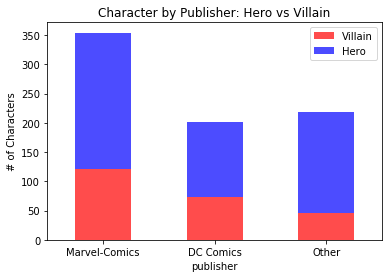

In [388]:
publishers_df = X_real.groupby(['publisher','y']).publisher.count().unstack()

p1 = publishers_df.plot(kind = 'bar', stacked = True, 
                   title = 'Character by Publisher: Hero vs Villain', 
                   color = ['red','blue'], alpha = .70)
p1.set_xlabel('publisher')
p1.set_ylabel('# of Characters')
p1.set_xticklabels(labels, rotation = 'horizontal', ha = "center")
p1.legend(['Villain','Hero'])

In [415]:
X_real.columns

Index(['alter-egos', 'relatives', 'occupation', 'base', 'combat', 'speed',
       'intelligence', 'power', 'durability', 'strength', 'publisher',
       'overall'],
      dtype='object')

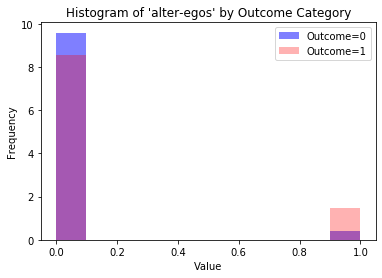

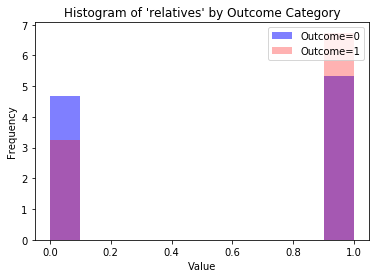

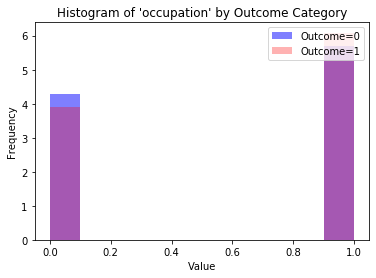

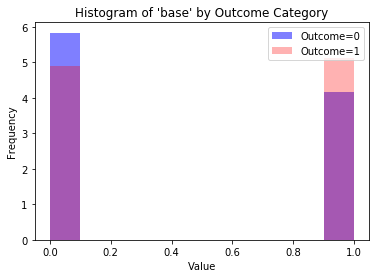

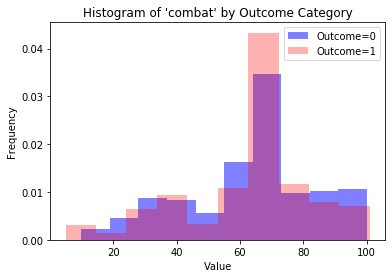

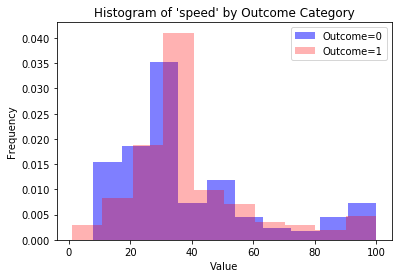

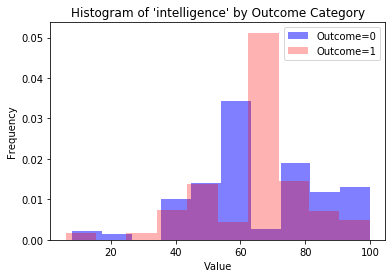

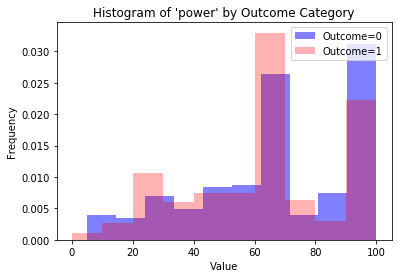

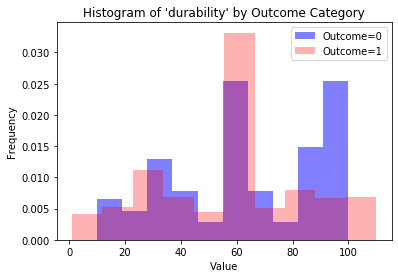

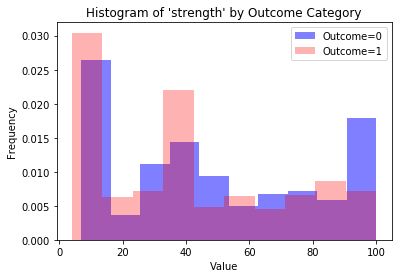

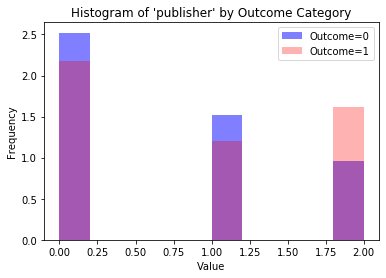

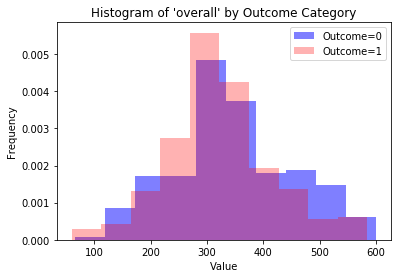

<Figure size 432x288 with 0 Axes>

In [434]:
#Viewing the univariate distribution for each feature in the testing dataframe

#Creating variables for the number of rows and columns
rows = 2
cols = 6

#Iterating through each row and column of the testing dataframe
col = X_real.columns
index = 0
for i in range(rows):
    for j in range(cols):
        plot_histogram_dv(X[col[index]], y)
        index += 1

plt.tight_layout()

In [448]:
#Importing libraries needed for cleaning and visualizations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [454]:
t = t.drop(['y'], axis = 1) 
t.head()

,alter-egos,relatives,occupation,base,combat,speed,intelligence,power,durability,strength,publisher,overall
0,0.0,1.0,1.0,0.0,64.0,17.0,38.0,24.0,80.0,100.0,0,323.0
1,0.0,1.0,1.0,0.0,85.0,35.0,88.0,100.0,65.0,28.0,2,401.0
2,0.0,1.0,1.0,1.0,65.0,53.0,50.0,99.0,64.0,90.0,1,421.0
3,0.0,1.0,1.0,1.0,95.0,53.0,63.0,62.0,90.0,80.0,0,443.0
4,0.0,1.0,1.0,0.0,55.0,83.0,88.0,100.0,100.0,63.0,0,489.0


In [556]:
powers_df

,combat,durability,intelligence,power,speed,strength
0,64.0,80.0,38.0,24.0,17.0,100.0
1,85.0,65.0,88.0,100.0,35.0,28.0
2,65.0,64.0,50.0,99.0,53.0,90.0
3,95.0,90.0,63.0,62.0,53.0,80.0
4,55.0,100.0,88.0,100.0,83.0,63.0
5,64.0,100.0,38.0,98.0,25.0,80.0
6,64.0,100.0,63.0,100.0,12.0,10.0
7,50.0,40.0,69.0,37.0,33.0,10.0
8,NaN,NaN,NaN,NaN,NaN,46.0
9,20.0,5.0,10.0,5.0,13.0,8.0
